# [YOLOv8](https://docs.ultralytics.com/)

## 설치
1. pytorch 설치
2. YOLOV8 설치
    - `pip install ultralytics`

In [2]:
import ultralytics

## 사용
- CLI (command line interface)에서 **터미널 명령어**로 추론/평가/학습을 진행할 수 있다.
- Python library 를 이용해 코드상에 원하는 추론/평가/학습을 진행할 수 있다.

# CLI 기본 명령어 구조

- 구문
    - <span style='font-size:1.3em'>**yolo**  **task**=detect|classify|segment|pose  **mode**=train|val|predict  **model**=yolov8n.yaml|yolov8n.pt|..  **args**</span>
    - <b style='font-size:1.2em'>task:</b> \[detect, classify, segment\] 중 하나를 지정한다. \[optional\]로 생략하면 모델을 보고 추측해서 task를 정한다.
        - **detect:** Object detection
        - **classify:** Image classification
        - **segment:** Instance segmentation
        - **pose:** Pose estimation
    - <b style='font-size:1.2em'>mode:</b> \[train, val, predict, export\] 중 하나를 지정한다. \[필수\]로 입력해야 한다.
        - **train:** custom dataset을 train 시킨다.
        - **val:** 모델 성능을 평가한다.
        - **predict:** 입력 이미지에 대한 추론을 한다.
        - **export:** 모델을 다른 형식으로 변환한다.
    - <b style='font-size:1.2em'>model:</b> **pretrained 모델**이나 **모델 설정 yaml 파일**의 경로를 설정한다. \[필수\]로 입력해야 한다.
        - pretrained 모델 파일경로
            - task에 맞는 pretrained 모델파일의 저장 경로를 지정한다.
            - transfer learnging을 하거나 fine tuning 시 방법
        - 모델 구조 설정 yaml 파일 경로
            - task에 맞는 pretrained 모델 설정파일(yaml파일)의 경로를 지정한다.
            - train mode에서 지정하며 모델을 새로 생성해서 처음부터 학습 시킬 경우 지정한다.
        - Ultralytics에서 제공하는 Pretrained 모델
            - 모델 크기에 따라 5개의 모델을 제공하며 큰 모델은 작은 모델에 비해 추론 성능이 좋은대신 속도는 느리다.
            - 모델은 처음 추론또는 학습할때 local 컴퓨터에 없으면 download 받는다.
            - https://github.com/ultralytics/ultralytics#models
            - ### 제공 모델
            
            | **task\모델크기**           | **nano** | **small_** | **medium** | **large** | **xlarge** |
            |:--------------------|----------|-------------|------------|-----------|----------|
            | **detection**      | yolov8n.pt     | yolov8s.pt     | yolov8m.pt     | yolov8l.pt     | yolov8x.pt     |
            | **segmentation**   | yolov8n-seg.pt | yolov8s-seg.pt | yolov8m-seg.pt | yolov8l-seg.pt | yolov8x-seg.pt |
            | **classification** | yolov8n-cls.pt | yolov8s-cls.pt | yolov8m-cls.pt | yolov8l-cls.pt | yolov8x-cls.pt |
            | **Pose estimation** | yolov8n-pose.pt | yolov8s-pose.pt | yolov8m-pose.pt | yolov8l-pose.pt | yolov8x-pose.pt |
            
            - 확장자가 `pt`이면 pretrained 된 모델을, `yaml`이면 모델 구조 설정파일을 download하여 실행한다.
                - pretrained model은 fine tuning이나 추론할 때, yaml설정파일은 처음부터 학습할 경우 설정하여 받는다.
    - <b style='font-size:1.2em'>args:</b> task와 mode과 관련한 추가 설정값들을 지정한다.
        - https://docs.ultralytics.com/cfg/

# [Object Detection](https://docs.ultralytics.com/tasks/detection/)

##  Predict (추론)

### 모델로딩
- Ultralytics에서 제공하는 Pretrained Model이나 직접 학습시킨 모델을 이용해 추론한다.
- Ultralytics는 Object Detection을 위한 [Pretrained 모델](#제공-모델)을 제공한다.
    - Object Detection 모델은 COCO dataset으로 학습되었다.
    - 모델 명을 지정하면 자동으로 다운로드를 받는다.

### CLI
`yolo task=detect mode=predict model=model_path source=추론할_image_path`
- 추가 설정 (configuration)
    - https://docs.ultralytics.com/cfg

> ### 추론 할 Source 설정
> - https://docs.ultralytics.com/modes/predict/#inference-sources
> - **Image:** 이미지파일경로, URL, PIL.Image, np.ndarray, torch.Tensor
> - **동영상:** 동영상파일경로, 유튜브 URL
> - **여러개의 영상처리:** 디렉토리 경로 또는 경로들을 원소로 가지는 리스트.

In [3]:
!yolo  task=detect  mode=predict   model=models/yolov8s.pt   source=01_test_image_detection/1.jpg  save=True  save_txt=True  save_crop=True line_width=1 


  0%|          | 0.00/21.5M [00:00<?, ?B/s]
  1%|          | 208k/21.5M [00:00<00:13, 1.70MB/s]
  3%|2         | 560k/21.5M [00:00<00:08, 2.57MB/s]
  4%|4         | 960k/21.5M [00:00<00:07, 3.06MB/s]
  6%|5         | 1.23M/21.5M [00:00<00:13, 1.54MB/s]
  7%|6         | 1.45M/21.5M [00:01<00:33, 636kB/s] 
  7%|7         | 1.59M/21.5M [00:02<00:39, 525kB/s]
  8%|7         | 1.70M/21.5M [00:03<01:26, 241kB/s]
  8%|8         | 1.78M/21.5M [00:05<02:21, 146kB/s]
  9%|8         | 1.84M/21.5M [00:06<02:44, 125kB/s]
  9%|8         | 1.88M/21.5M [00:07<03:12, 107kB/s]
  9%|8         | 1.91M/21.5M [00:07<03:18, 104kB/s]
  9%|8         | 1.93M/21.5M [00:07<03:10, 108kB/s]
  9%|9         | 1.95M/21.5M [00:08<04:00, 85.2kB/s]
  9%|9         | 1.98M/21.5M [00:08<03:32, 96.4kB/s]
  9%|9         | 2.02M/21.5M [00:08<02:58, 115kB/s] 
 10%|9         | 2.05M/21.5M [00:08<02:35, 131kB/s]
 10%|9         | 2.08M/21.5M [00:08<02:20, 146kB/s]
 10%|9         | 2.10M/21.5M [00:09<02:14, 151kB/s]
 10%|9        


Ultralytics YOLOv8.1.13 �윓� Python-3.10.13 torch-2.2.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 C:\Users\Playdata\Downloads\Playdata_\08_computervision\�떎�뒿\01_test_image_detection\1.jpg: 480x640 7 persons, 1 bicycle, 6 cars, 2 motorcycles, 2 buss, 3 traffic lights, 1 dog, 1 handbag, 267.0ms
Speed: 15.6ms preprocess, 267.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels
�윊� Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# source=정수 - 웹캠연결. 정수: 웹캠 ID
!yolo  task=detect  mode=predict   model=models/yolov8s.pt  source=0  show=True

In [6]:
# source=정수 - 웹캠연결. 정수: 웹캠 ID
!yolo  task=detect  mode=predict   model=models/yolov8s.pt  source=01_test_image_detection/mp4/indo_street.mp4  show=True

Ultralytics YOLOv8.1.13 �윓� Python-3.10.13 torch-2.2.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

video 1/1 (1/350) C:\Users\Playdata\Downloads\Playdata_\08_computervision\�떎�뒿\01_test_image_detection\mp4\indo_street.mp4: 384x640 12 persons, 1 umbrella, 216.9ms
video 1/1 (2/350) C:\Users\Playdata\Downloads\Playdata_\08_computervision\�떎�뒿\01_test_image_detection\mp4\indo_street.mp4: 384x640 12 persons, 1 umbrella, 188.3ms
video 1/1 (3/350) C:\Users\Playdata\Downloads\Playdata_\08_computervision\�떎�뒿\01_test_image_detection\mp4\indo_street.mp4: 384x640 13 persons, 188.4ms
video 1/1 (4/350) C:\Users\Playdata\Downloads\Playdata_\08_computervision\�떎�뒿\01_test_image_detection\mp4\indo_street.mp4: 384x640 15 persons, 174.3ms
video 1/1 (5/350) C:\Users\Playdata\Downloads\Playdata_\08_computervision\�떎�뒿\01_test_image_detection\mp4\indo_street.mp4: 384x640 11 persons, 1 umbrella, 188.3ms
video 1/1 (6/

### Python

In [2]:
from ultralytics import YOLO
import ultralytics
ultralytics.__version__

'8.1.13'

In [3]:
model = YOLO("models/yolov8s.pt")  # YOLO 클래스 객체 생성하면서 사용할 pretrained model의 경로를 지정.

In [4]:
# 추론
image_path = '01_test_image_detection/2.jpg'
# 리스트에 추론한 결과를 추론한 이미지별로 저장해서 반환.
result_list = model(image_path, save=True, save_txt=True, line_width=1)


image 1/1 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_detection\2.jpg: 448x640 15 persons, 4 cars, 1 motorcycle, 3 buss, 1 truck, 5 traffic lights, 244.0ms
Speed: 2.0ms preprocess, 244.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4
1 label saved to runs\detect\predict4\labels


In [5]:
type(result_list), len(result_list), type(result_list[0])

(list, 1, ultralytics.engine.results.Results)

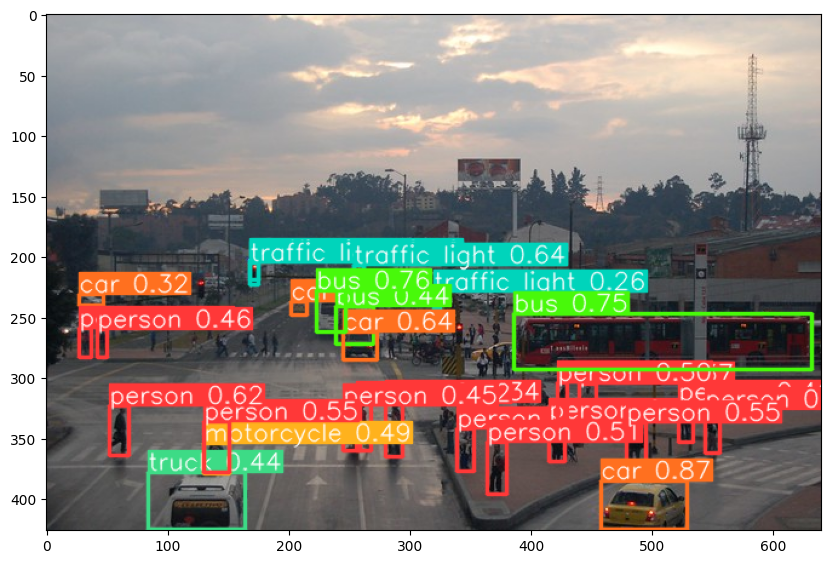

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(result_list[0].plot()[:,:,::-1]);  # 결과 이미지 channel 이 BGR 모드이기 때문에 matplotlib으로 출력하기 위해서는 RGB 로 변환해야 한다.

In [9]:
import cv2

cv2.imshow("frame", result_list[0].plot())
cv2.waitKey()
cv2.destroyAllWindows()

### web상의 이미지 추론

In [10]:
# url을 넣으면 다운 받은 뒤 처리
result_list = model("https://ultralytics.com/images/bus.jpg", save=True)

100%|█████████████████████████████| 476k/476k [00:00<00:00, 3.33MB/s]


image 1/1 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\bus.jpg: 640x480 4 persons, 1 bus, 286.5ms
Speed: 15.2ms preprocess, 286.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict4
2 labels saved to runs\detect\predict4\labels


In [11]:
result_list = model('https://tour.jeonju.go.kr/upload_data/board_data/BBS_0000003/163883840742541.jpg', save=True)
# result_list = model('https://a.cdn-hotels.com/gdcs/production148/d622/18f614cb-23aa-475e-b73a-b32e6a7b412a.jpg', save=True)#, save_crop=True)

100%|█████████████████████████████| 343k/343k [00:00<00:00, 6.52MB/s]


image 1/1 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\163883840742541.jpg: 448x640 4 persons, 1 zebra, 216.1ms
Speed: 3.9ms preprocess, 216.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4
3 labels saved to runs\detect\predict4\labels


### 한번에 여러장 추론
- 추론한 이미지들이 **같은 경로(Path)에** 있을 경우 **그 디렉토리의 경로를 문자열로 전달한다.**
- 추론할 이미지들아 **서로 다른 경로에** 있을 경우 **리스트에 경로들을 모아서 전달한다.**
    

In [12]:
from ultralytics import YOLO

model = YOLO('models/yolov8s.pt')
result_list = model("01_test_image_detection", save=True, save_txt=True, line_width=1)
print(len(result_list))


image 1/6 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_detection\1.jpg: 480x640 7 persons, 1 bicycle, 6 cars, 2 motorcycles, 2 buss, 3 traffic lights, 1 dog, 1 handbag, 261.3ms
image 2/6 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_detection\2.jpg: 448x640 15 persons, 4 cars, 1 motorcycle, 3 buss, 1 truck, 5 traffic lights, 211.0ms
image 3/6 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_detection\3.jpg: 448x640 1 car, 1 cup, 1 chair, 1 tv, 1 mouse, 1 keyboard, 3 cell phones, 195.5ms
image 4/6 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_detection\4.jpg: 480x640 3 elephants, 1 zebra, 234.3ms
image 5/6 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_detection\5.jpg: 384x640 13 persons, 2 bottles, 17 wine glasss, 4 cups, 3 forks, 1 knife, 1 bowl, 2 dining tables, 209.9ms
image 6/6 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\01_test_image_d

In [13]:
from glob import glob
paths = glob('./01_test_image_detection/**/*.jpg', recursive=True)
paths

['./01_test_image_detection\\1.jpg',
 './01_test_image_detection\\2.jpg',
 './01_test_image_detection\\3.jpg',
 './01_test_image_detection\\4.jpg',
 './01_test_image_detection\\5.jpg',
 './01_test_image_detection\\6.jpg',
 './01_test_image_detection\\fruits\\apple.jpg',
 './01_test_image_detection\\fruits\\banana.jpg',
 './01_test_image_detection\\fruits\\banana2.jpg',
 './01_test_image_detection\\fruits\\capsicum1.jpg',
 './01_test_image_detection\\fruits\\capsicum2.jpg',
 './01_test_image_detection\\fruits\\eggplant.jpg',
 './01_test_image_detection\\fruits\\grape.jpg',
 './01_test_image_detection\\fruits\\melon1.jpg',
 './01_test_image_detection\\fruits\\melon2.jpg',
 './01_test_image_detection\\fruits\\pineapple.jpg',
 './01_test_image_detection\\fruits\\pineapple2.jpg',
 './01_test_image_detection\\fruits\\pomegranate.jpg']

In [14]:
model = YOLO('models/yolov8s.pt')
result_list = model(paths, save=True, save_txt=True, line_width=1)
print(len(result_list))


0: 640x640 7 persons, 1 bicycle, 6 cars, 3 motorcycles, 2 buss, 3 traffic lights, 1 dog, 1 backpack, 1 handbag, 1: 640x640 15 persons, 4 cars, 1 motorcycle, 3 buss, 1 truck, 6 traffic lights, 2: 640x640 1 car, 1 cup, 1 chair, 1 tv, 1 mouse, 1 keyboard, 3 cell phones, 3: 640x640 3 elephants, 1 zebra, 4: 640x640 12 persons, 2 bottles, 15 wine glasss, 3 cups, 3 forks, 1 knife, 1 bowl, 2 dining tables, 5: 640x640 2 persons, 3 cups, 1 fork, 1 knife, 4 pizzas, 1 dining table, 6: 640x640 1 bowl, 6 apples, 1 dining table, 7: 640x640 1 banana, 8: 640x640 1 banana, 9: 640x640 1 apple, 2 vases, 10: 640x640 (no detections), 11: 640x640 1 dining table, 12: 640x640 3 apples, 13: 640x640 1 vase, 14: 640x640 1 banana, 1 orange, 1 vase, 15: 640x640 1 vase, 16: 640x640 1 broccoli, 17: 640x640 2 apples, 6460.5ms
Speed: 6.1ms preprocess, 358.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6
17 labels saved to runs\detect\predict6\labels
18


### 동영상

In [ ]:
model = YOLO('models/yolov8n.pt')
result = model("01_test_image_detection/mp4/indo_street.mp4", save=True, show=True)
print(len(result))  # 동영상 Frame 별로 디텍션한 결과

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(result[-1].plot()[:,:,::-1]);

# 추론결과

### ultralytics.yolo.engine.results.Results
- 모델의 추론 결과는 list에 이미지별 예측결과를 Results에 담아 반환한다.
- **Results** : 한개 이미지에 대한 추론결과를 담는 객체
- 추론 종류에 따라 다음 속성을 이용해 결과를 조회한다.
    - Detection: `result.boxes` - Boxes type
    - Segmentation: `result.masks` - Masks type
    - Classification: `result.probs` - Probs type
    - Pose estimator: `result.keypoints` - Keypoints  type
- 추가 정보
    - Results.orig_img: 추론한 원본 이미지
    - Results.orig_shape: 추론한 원본 이미지의 크기 (height, width)
    - Results.path: 추론한 원본이미지의 경로

In [15]:
from ultralytics import YOLO

model = YOLO('models/yolov8s.pt')
result_list = model('bus.jpg', save=True)


image 1/1 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\bus.jpg: 640x480 4 persons, 1 bus, 243.0ms
Speed: 3.8ms preprocess, 243.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict7


In [16]:
print(type(result_list), # LIST: 결과들을 묶어서 반환해야 하므로.
      len(result_list),  # 이미지 한장이므로  length는 1
      type(result_list[0]))

<class 'list'> 1 <class 'ultralytics.engine.results.Results'>


In [17]:
result = result_list[0]
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [21]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.])
conf: tensor([0.9202, 0.8988, 0.8873, 0.8805, 0.6382])
data: tensor([[1.9989e+01, 2.2960e+02, 8.0562e+02, 7.4782e+02, 9.2022e-01, 5.0000e+00],
        [6.6772e+02, 3.8936e+02, 8.0967e+02, 8.7938e+02, 8.9877e-01, 0.0000e+00],
        [5.0511e+01, 4.0051e+02, 2.4500e+02, 9.0293e+02, 8.8731e-01, 0.0000e+00],
        [2.2200e+02, 4.0819e+02, 3.4526e+02, 8.6076e+02, 8.8055e-01, 0.0000e+00],
        [1.7374e-01, 5.5013e+02, 6.7284e+01, 8.6807e+02, 6.3816e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[412.8051, 488.7100, 785.6316, 518.2142],
        [738.6946, 634.3691, 141.9548, 490.0229],
        [147.7544, 651.7199, 194.4868, 502.4294],
        [283.6280, 634.4742, 123.2612, 452.5717],
        [ 33.7287, 709.0996,  67.1100, 317.9405]])
xywhn: tensor([[0.5096, 0.4525, 0.9699, 0.4798],
        [0.9120, 0.5874, 0.1753, 0.4537],
        [0.18

In [18]:
print(result.names) # 추론 classes => YOLO는 COCO dataset class-80으로 학습함.

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [19]:
# 추론한 원본 이미지에 대한 정보
print('원본 이미지 경로:', result.path)
print('원본 이미지 크기:', result.orig_shape)  # (height, width)
print('원본 이미지:', type(result.orig_img), result.orig_img.dtype, result.orig_img.shape) 

원본 이미지 경로: C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\bus.jpg
원본 이미지 크기: (1080, 810)
원본 이미지: <class 'numpy.ndarray'> uint8 (1080, 810, 3)


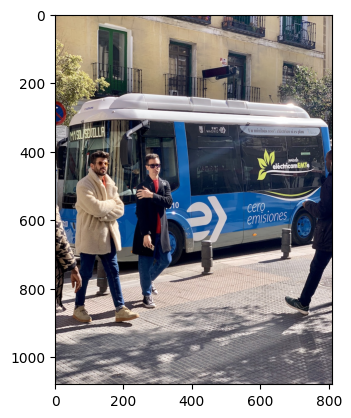

In [22]:
import matplotlib.pyplot as plt
plt.imshow(result.orig_img[:,:,::-1])

### Object Detection 결과값 조회

- ultralytics.yolo.engine.results.**Boxes**에 추론 결과를 담아 반환
    - Results.boxes로 조회
- 주요 속성
    - shape: 결과 shape. (찾은 물체개수, 6)
    - boxes
        - 6: 좌상단 x, 좌상단 y, 우하단 x, 우하단 y, confidence score, label
    - xyxy
        - bounding box의 `좌상단 x, 좌상단 y, 우하단 x, 우하단 y` 좌표 반환
    - xyxyn
        - xyxy를 이미지 대비 비율로 반환
    - xywh
        - bounding box의 `center x, center y, 너비, 높이` 를 반환
    - xywhn
        - xywh를 이미지 대비 비율로 반환
    - cls: 찾은 물체의 label
    - conf: cls에 대한 confidence score (그 물체일 확률)
    - boxes
        - `x, y, x, y, conf, cls` tensor를 반환

In [23]:
boxes = result.boxes  # detection한 결과를 조회 (Boxes 객체)
print(type(boxes))

<class 'ultralytics.engine.results.Boxes'>


In [24]:
boxes.shape
# [n, 6] : n: 찾은 bbox 개수, 6: x y x y label confidence_score  (xyxy는 좌상단, 우하단 좌표)

torch.Size([5, 6])

In [45]:
import torch
import numpy as np

In [26]:
class_to_idx = np.array([v for k, v in result.names.items()]) 
class_to_idx#[0]

array(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
       'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
       'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'], dtype='<U14')

In [35]:
# pytorch: torch.tensor -> numpy ndarray 변환
boxes.cls.cpu().numpy().astype('int')

array([5, 0, 0, 0, 0])

In [27]:
# 찾은 bbox들에 대한 classification 정보

print(boxes.cls)  # 찾은 n개 bbox에 대한 class 반환.
print(class_to_idx[boxes.cls.cpu().numpy().astype('int')])  # torch tensor를 ndarray로 변환
print(boxes.conf) # 찾은 n개 bbox에대한 confidence score(확률) 반환

tensor([5., 0., 0., 0., 0.])
['bus' 'person' 'person' 'person' 'person']
tensor([0.9202, 0.8988, 0.8873, 0.8805, 0.6382])


In [28]:
# bbox의 위치정보
print(boxes.xyxy)  # 좌상단 우하단 x/y좌표
print(boxes.xyxyn) # 이미지 크기 대비 비율

tensor([[1.9989e+01, 2.2960e+02, 8.0562e+02, 7.4782e+02],
        [6.6772e+02, 3.8936e+02, 8.0967e+02, 8.7938e+02],
        [5.0511e+01, 4.0051e+02, 2.4500e+02, 9.0293e+02],
        [2.2200e+02, 4.0819e+02, 3.4526e+02, 8.6076e+02],
        [1.7374e-01, 5.5013e+02, 6.7284e+01, 8.6807e+02]])
tensor([[2.4678e-02, 2.1260e-01, 9.9459e-01, 6.9242e-01],
        [8.2434e-01, 3.6052e-01, 9.9959e-01, 8.1424e-01],
        [6.2359e-02, 3.7084e-01, 3.0247e-01, 8.3605e-01],
        [2.7407e-01, 3.7795e-01, 4.2625e-01, 7.9700e-01],
        [2.1449e-04, 5.0938e-01, 8.3066e-02, 8.0377e-01]])


In [29]:
print(boxes.xywh)  # center x, y좌표, bbox width, height
print(boxes.xywhn)  # center x, y좌표, bbox width, height 이미지크기 대비 비율

tensor([[412.8051, 488.7100, 785.6316, 518.2142],
        [738.6946, 634.3691, 141.9548, 490.0229],
        [147.7544, 651.7199, 194.4868, 502.4294],
        [283.6280, 634.4742, 123.2612, 452.5717],
        [ 33.7287, 709.0996,  67.1100, 317.9405]])
tensor([[0.5096, 0.4525, 0.9699, 0.4798],
        [0.9120, 0.5874, 0.1753, 0.4537],
        [0.1824, 0.6034, 0.2401, 0.4652],
        [0.3502, 0.5875, 0.1522, 0.4190],
        [0.0416, 0.6566, 0.0829, 0.2944]])


In [49]:
boxes.cls[0].item() # tensor가 한개값인 경우 파이썬 상수로 만든다.

5.0

In [50]:
# 원본 이미지에 추론 결과를 출력
import cv2
from ultralytics import YOLO

model = YOLO('models/yolov8m.pt')
path = 'bus.jpg'
# path = '01_test_image_detection/1.jpg'
result_list = model(path, save=True)
result = result_list[0]

org_img = result.orig_img  #BGR 원본 이미지
img = org_img.copy()

boxes = result.boxes # Object Detect 결과
xyxy_list = boxes.xyxy  #좌상단/우하단 좌표
cls_list = boxes.cls    #label
conf_list = boxes.conf  #label  확률.

person_cnt = 0
for xyxy, cls, conf in zip(xyxy_list, cls_list, conf_list):

    # 사람인지 확인
    if int(cls.item()) == 0 and conf > 0.7:
        person_cnt += 1
        
    xyxy_arr = xyxy.to('cpu').numpy().astype('int32') # tensor -> cpu: RAM 옮기기 -> ndarray 변환 -> 정수 변환
    pt1 = xyxy_arr[:2] # 좌상단 좌표
    pt2 = xyxy_arr[2:] # 우하단 좌표
    
    print(int(cls.item()))
    label_name = class_to_idx[int(cls.item())] # class name을 조회
    txt = f"{label_name}-{conf.item()*100:.2f}"
    
    # bbox 그리기 (사각형)
    cv2.rectangle(img, pt1=pt1, pt2=pt2, color=(255,255,255), thickness=2)
    # class name 그리기 (텍스트)
    cv2.putText(img, text=txt, org=pt1, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.6, 
                color=(0,0,255), thickness=1, lineType=cv2.LINE_AA)
    
cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


image 1/1 C:\Users\Playdata\Downloads\Playdata_\08_computervision\실습\bus.jpg: 640x480 4 persons, 1 bus, 507.0ms
Speed: 15.2ms preprocess, 507.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict9
5
0
0
0
0


In [51]:
person_cnt

4